# Can you read the four csv files (and create data frames) in Python?

### Importing the different datasets

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_california = pd.read_csv('https://raw.githubusercontent.com/ju-mk/PHE_Heart_disease/main/california_heart.csv')
df_cleveland = pd.read_csv('https://raw.githubusercontent.com/ju-mk/PHE_Heart_disease/main/cleveland_heart.csv')
df_hungary = pd.read_csv('https://raw.githubusercontent.com/ju-mk/PHE_Heart_disease/main/hungary_heart.csv')
df_switzerland = pd.read_csv('https://raw.githubusercontent.com/ju-mk/PHE_Heart_disease/main/switzerland_heart.csv')

print(df_california.head(5))


   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   4     140.0  260.0  0.0        1    112.0    1.0      3.0   
1   44    1   4     130.0  209.0  0.0        1    127.0    0.0      0.0   
2   60    1   4     132.0  218.0  0.0        1    140.0    1.0      1.5   
3   55    1   4     142.0  228.0  0.0        1    149.0    1.0      2.5   
4   66    1   3     110.0  213.0  1.0        2     99.0    1.0      1.3   

   slope  ca  thal  num  
0    2.0 NaN   NaN    2  
1    NaN NaN   NaN    0  
2    3.0 NaN   NaN    2  
3    1.0 NaN   NaN    1  
4    2.0 NaN   NaN    0  


Attribute Information (14 used):
 - 1. #3  (age): age in years       
 - 2. #4  (sex): sex (1 = male; 0 = female)     
 - 3. #9  (cp): chest pain type
     -- Value 1: typical angina
     -- Value 2: atypical angina
     -- Value 3: non-anginal pain
     -- Value 4: asymptomatic        
 - 4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)
 - 5. #12 (chol): serum cholestoral in mg/dl   
 - 6. #16 (fbs): (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)      
 - 7. #19 (restecg): resting electrocardiographic results
     -- Value 0: normal
     -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 - 8. #32 (thalach): maximum heart rate achieved  
 - 9. #38 (exang): exercise induced angina (1 = yes; 0 = no)    
 - 10. #40 (oldpeak): ST depression induced by exercise relative to rest 
 - 11. #41 (slope): the slope of the peak exercise ST segment
     -- Value 1: upsloping
     -- Value 2: flat
     -- Value 3: downsloping    
 - 12. #44 (ca): number of major vessels (0-3) colored by flourosopy       
 - 13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect      
 - 14. #58 (num): diagnosis of heart disease (angiographic disease status)
     -- Value 0: < 50% diameter narrowing
     -- Value 1: > 50% diameter narrowing
     (in any major vessel: attributes 59 through 68 are vessels)       
     (the predicted attribute)



# Can you explore the data using skills gained during the group project?

### Information about the age groups in the datasets

In [11]:
df_california['age'].describe()

count    200.000000
mean      59.350000
std        7.811697
min       35.000000
25%       55.000000
50%       60.000000
75%       64.000000
max       77.000000
Name: age, dtype: float64

In [12]:
df_cleveland['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [13]:
df_hungary['age'].describe()

count    294.000000
mean      47.826531
std        7.811812
min       28.000000
25%       42.000000
50%       49.000000
75%       54.000000
max       66.000000
Name: age, dtype: float64

In [14]:
df_switzerland['age'].describe()

count    123.000000
mean      55.317073
std        9.032108
min       32.000000
25%       51.000000
50%       56.000000
75%       61.500000
max       74.000000
Name: age, dtype: float64

### Information about the diagnosis of heart disease:

In [94]:
#checking the type of the column attributes
#df_california.dtypes

#converting the 'num' attribute to categorical
df_california['num'] = pd.Categorical(df_california.num)
df_california.dtypes

#print(df_california['num'].value_counts())
#print(df_cleveland['num'].value_counts())

age             int64
sex             int64
cp              int64
trestbps      float64
chol          float64
fbs           float64
restecg         int64
thalach       float64
exang         float64
oldpeak       float64
slope         float64
ca            float64
thal          float64
num          category
diagnosis        bool
dtype: object

<AxesSubplot:title={'center':'Percentage of individuals with each level of heart disease - Switzerland'}, ylabel='num'>

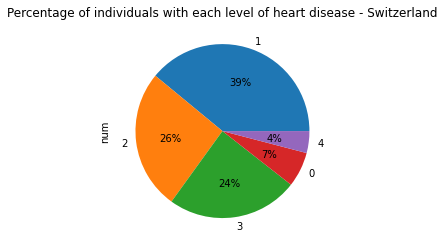

In [68]:
'''df_california['num'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    title = 'Percentage of individuals with each level of heart disease - California')

df_cleveland['num'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    title = 'Percentage of individuals with each level of heart disease - Cleveland')

df_hungary['num'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    title = 'Percentage of individuals with each level of heart disease - Hungary')'''

df_switzerland['num'].value_counts().plot(
    kind='pie', 
    autopct='%1.0f%%', 
    title = 'Percentage of individuals with each level of heart disease - Switzerland')

### Is there an association between sex and the presence of heart disease?

In [112]:
#Creating a new column to transform 'num' into presence or absence of heart disease

df_california["diagnosis"] = np.where(df_california['num'] != 0, True, False)
df_california.head(10)

df_cleveland["diagnosis"] = np.where(df_cleveland['num'] != 0, True, False)
df_california.head(10)

df_hungary["diagnosis"] = np.where(df_hungary['num'] != 0, True, False)
df_california.head(10)

df_switzerland["diagnosis"] = np.where(df_switzerland['num'] != 0, True, False)
df_california.head(10)

cali_tab = pd.crosstab(df_california['sex'], df_california['diagnosis'])
print(cali_tab)

clev_tab = pd.crosstab(df_cleveland['sex'], df_cleveland['diagnosis'])
print(clev_tab)

hung_tab = pd.crosstab(df_hungary['sex'], df_hungary['diagnosis'])
print(hung_tab)

switz_tab = pd.crosstab(df_switzerland['sex'], df_switzerland['diagnosis'])
print(switz_tab)

diagnosis  False  True
sex                   
0              3     3
1             48   146
diagnosis  False  True
sex                   
0             72    25
1             92   114
diagnosis  False  True
sex                   
0             69    12
1            119    94
diagnosis  False  True
sex                   
0              0    10
1              8   105


### Is there an association between age and heart disease?

Text(0.5, 1.0, 'Age according to Heart disease diagnosis - Switzerland')

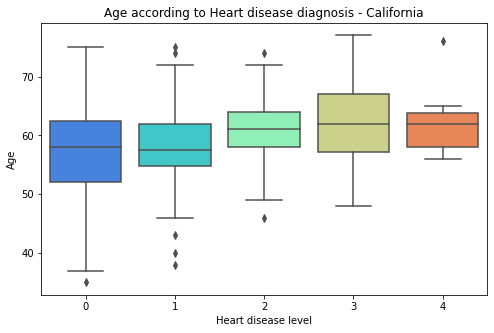

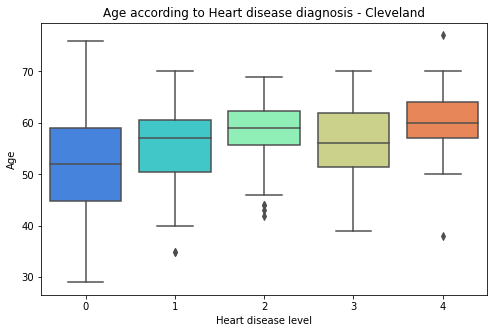

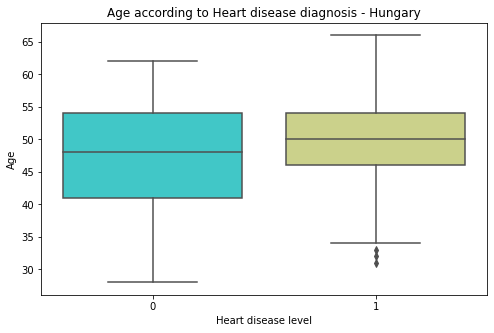

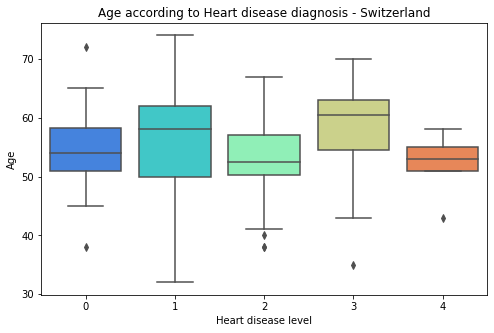

In [118]:
plt.figure(figsize=(8,5))
sns.boxplot(x='num', y='age', data=df_california, palette='rainbow').set(
    xlabel='Heart disease level', ylabel='Age')
plt.title("Age according to Heart disease diagnosis - California")

plt.figure(figsize=(8,5))
sns.boxplot(x='num', y='age', data=df_cleveland, palette='rainbow').set(
    xlabel='Heart disease level', ylabel='Age')
plt.title("Age according to Heart disease diagnosis - Cleveland")

plt.figure(figsize=(8,5))
sns.boxplot(x='num', y='age', data=df_hungary, palette='rainbow').set(
    xlabel='Heart disease level', ylabel='Age')
plt.title("Age according to Heart disease diagnosis - Hungary")

plt.figure(figsize=(8,5))
sns.boxplot(x='num', y='age', data=df_switzerland, palette='rainbow').set(
    xlabel='Heart disease level', ylabel='Age')
plt.title("Age according to Heart disease diagnosis - Switzerland")

### Is there an association between chest pain and heart disease?

In [124]:
#Creating a new column 'chest_pain' where TRUE !=4 (4=asymptomatic = FALSE), so the values 1-3 are TRUE.

df_california["chest_pain"] = np.where(df_california['cp'] != 4, True, False)

df_cleveland["chest_pain"] = np.where(df_cleveland['cp'] != 4, True, False)

df_hungary["chest_pain"] = np.where(df_hungary['cp'] != 4, True, False)

df_switzerland["chest_pain"] = np.where(df_switzerland['cp'] != 4, True, False)
df_switzerland.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis,chest_pain
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1,True,True
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1,True,False
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3,True,False
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1,True,False
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2,True,False
5,38,0,4,110.0,0,0.0,0.0,156.0,0.0,0.0,2.0,NaN,3.0,1,True,False
6,38,1,3,100.0,0,NaN,0.0,179.0,0.0,-1.1,1.0,NaN,NaN,0,False,True
7,38,1,3,115.0,0,0.0,0.0,128.0,1.0,0.0,2.0,NaN,7.0,1,True,True
8,38,1,4,135.0,0,NaN,0.0,150.0,0.0,0.0,NaN,NaN,3.0,2,True,False
9,38,1,4,150.0,0,NaN,0.0,120.0,1.0,NaN,NaN,NaN,3.0,1,True,False


Text(0.5, 1.0, 'Count of patients diagnosed with heart disease, according to the presence of chest pain - Switzerland')

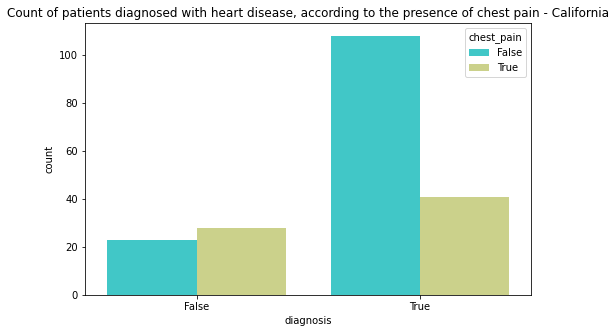

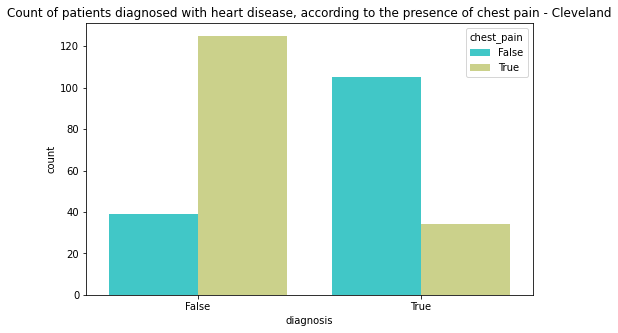

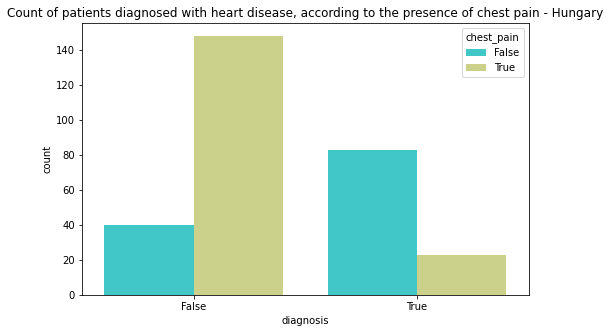

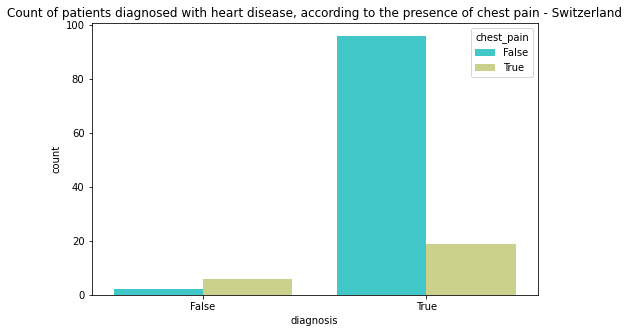

In [131]:
plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis',data=df_california, palette="rainbow", hue='chest_pain')
plt.title("Count of patients diagnosed with heart disease, according to the presence of chest pain - California")

plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis',data=df_cleveland, palette="rainbow", hue='chest_pain')
plt.title("Count of patients diagnosed with heart disease, according to the presence of chest pain - Cleveland")

plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis',data=df_hungary, palette="rainbow", hue='chest_pain')
plt.title("Count of patients diagnosed with heart disease, according to the presence of chest pain - Hungary")

plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis',data=df_switzerland, palette="rainbow", hue='chest_pain')
plt.title("Count of patients diagnosed with heart disease, according to the presence of chest pain - Switzerland")

# How do you set up a database in Python? Can you write the data to an SQLite table? Think about how to import the SQLite module in Python.

In [151]:
# Importing the modules
import csv, sqlite3

#Creating a SQL connection to my database:
con = sqlite3.connect('Heart_disease_database')

#Creating a cursor object to interact with the database:
cur = con.cursor()

#Creating a California table within the database using the csv file:
cur.execute("DROP TABLE IF EXISTS California")
cur.execute("CREATE TABLE California (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num);")
with open('california_heart.csv', 'r') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['age'], i['sex'], i['cp'], i['trestbps'], i['chol'], i['fbs'], i['restecg'], i['thalach'], i['exang'], i['oldpeak'], i['slope'], i['ca'], i['thal'], i['num']) for i in dr]

cur.executemany("INSERT INTO California (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
con.commit()

#Creating a Cleveland table within the database using the csv file:
cur.execute("DROP TABLE IF EXISTS Cleveland")
cur.execute("CREATE TABLE Cleveland (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num);")
with open('cleveland_heart.csv', 'r') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['age'], i['sex'], i['cp'], i['trestbps'], i['chol'], i['fbs'], i['restecg'], i['thalach'], i['exang'], i['oldpeak'], i['slope'], i['ca'], i['thal'], i['num']) for i in dr]

cur.executemany("INSERT INTO Cleveland (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
con.commit()

#Creating a Hungary table within the database using the csv file:
cur.execute("DROP TABLE IF EXISTS Hungary")
cur.execute("CREATE TABLE Hungary (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num);")
with open('Hungary_heart.csv', 'r') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['age'], i['sex'], i['cp'], i['trestbps'], i['chol'], i['fbs'], i['restecg'], i['thalach'], i['exang'], i['oldpeak'], i['slope'], i['ca'], i['thal'], i['num']) for i in dr]

cur.executemany("INSERT INTO Hungary (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
con.commit()

#Creating a Switzerland table within the database using the csv file:
cur.execute("DROP TABLE IF EXISTS Switzerland")
cur.execute("CREATE TABLE Switzerland (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num);")
with open('Switzerland_heart.csv', 'r') as fin:
    dr = csv.DictReader(fin)
    to_db = [(i['age'], i['sex'], i['cp'], i['trestbps'], i['chol'], i['fbs'], i['restecg'], i['thalach'], i['exang'], i['oldpeak'], i['slope'], i['ca'], i['thal'], i['num']) for i in dr]

cur.executemany("INSERT INTO Switzerland (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
con.commit()

#Closing the connection to the database
con.close()

In [139]:
con = sqlite3.connect('Heart_disease_database')
cur = con.cursor()

cur.execute('SELECT Age, sex FROM California ORDER BY ROWID ASC LIMIT 3')
result = cur.fetchall();
print(result)

[('63', '1'), ('44', '1'), ('60', '1')]


In [185]:
con = sqlite3.connect("Heart_disease_database")
high_chol = pd.read_sql_query("SELECT age, sex, chol, trestbps FROM California WHERE chol > '200'", con)

print(high_chol)

con.close()

    age sex chol trestbps
0    63   1  260      140
1    44   1  209      130
2    60   1  218      132
3    55   1  228      142
4    66   1  213      110
..   ..  ..  ...      ...
119  46   1  310      134
120  54   0  333      127
121  55   1  223      122
122  58   1  385       NA
123  62   1  254      120

[124 rows x 4 columns]
